# **Titanic Disaster Analysis**

**Goal:** This project aims to analyze the scenario from Titanic disaster dataset from Kaggle.

**Dataset:** https://www.kaggle.com/c/titanic/data

# **Importing Necessary Libraries**

In [1]:
pip install pandas

In [2]:
pip install openpyxl

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Retrieving Data**

In [4]:
import pandas as pd

df = pd.read_excel('/content/drive/My Drive/Train.xlsx', sheet_name = 'Train')
print(df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

# **Data Cleaning**

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
# Handling 'Age' column
df['Age'].fillna(df['Age'].median(), inplace = True)

<ipython-input-21-6996ea2cac3e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


In [22]:
# Handling 'Cabin' column
df['Cabin_known'] = df['Cabin'].notnull().astype(int)
df.drop(columns = ['Cabin'], inplace = True)

In [23]:
# Handling 'Embarked' column
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

<ipython-input-23-809e96cfd404>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


In [24]:
# Check for outliers
import numpy as np

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Compute Q1, Q3, and IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and print outliers for each numeric column
for col in numeric_cols.columns:
    outliers = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]
    if not outliers.empty:
        print(f"\nOutliers in '{col}':")
        print(outliers[[col]])


Outliers in 'Age':
       Age
7     2.00
11   58.00
15   55.00
16    2.00
33   66.00
..     ...
827   1.00
829  62.00
831   0.83
851  74.00
879  56.00

[66 rows x 1 columns]

Outliers in 'SibSp':
     SibSp
7        3
16       4
24       3
27       3
50       4
59       5
63       3
68       4
71       5
85       3
88       3
119      4
159      8
164      4
171      4
176      3
180      8
182      4
201      8
229      3
233      4
261      4
266      4
278      4
324      8
341      3
374      3
386      5
409      3
480      5
485      3
541      4
542      4
634      3
642      3
683      5
686      4
726      3
787      4
792      8
813      4
819      3
824      4
846      8
850      4
863      8

Outliers in 'Parch':
     Parch
7        1
8        2
10       1
13       5
16       1
..     ...
871      1
879      1
880      1
885      5
888      2

[213 rows x 1 columns]

Outliers in 'Fare':
         Fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
52    76.7292
.. 

In [25]:
# Cap the outliers
df_capped = df.copy()
for col in numeric_cols.columns:
    df_capped[col] = np.where(df_capped[col] < lower_bound[col], lower_bound[col], df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper_bound[col], upper_bound[col], df_capped[col])

# Display the descriptive statistics and data types of the capped dataframe
print(df_capped.describe())
print(df_capped.dtypes)

       PassengerId    Survived      Pclass         Age       SibSp  Parch  \
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.0   
mean    446.000000    0.383838    2.308642   29.039282    0.426487    0.0   
std     257.353842    0.486592    0.836071   12.072074    0.708246    0.0   
min       1.000000    0.000000    1.000000    2.500000    0.000000    0.0   
25%     223.500000    0.000000    2.000000   22.000000    0.000000    0.0   
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.0   
75%     668.500000    1.000000    3.000000   35.000000    1.000000    0.0   
max     891.000000    1.000000    3.000000   54.500000    2.500000    0.0   

             Fare  Cabin_known  
count  891.000000        891.0  
mean    24.046813          0.0  
std     20.481625          0.0  
min      0.000000          0.0  
25%      7.910400          0.0  
50%     14.454200          0.0  
75%     31.000000          0.0  
max     65.634400          0.0  
Passenger

In [26]:
# Identify duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:\n", duplicates)

duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:", len(duplicate_rows))

Duplicate Rows:
 Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked, Age_Group, Cabin_known]
Index: []
Duplicate Rows: 0


In [38]:
# Identify duplicate columns
def duplicate_columns(data):
    duplicate_cols = []
    cols_seen = {}

    # Loop through all columns and compare their data
    for col in data.columns:
        col_data = tuple(data[col])
        if col_data in cols_seen:
            duplicate_cols.append(col)
        else:
            cols_seen[col_data] = col

    return duplicate_cols

# Identify duplicate columns
duplicates = duplicate_columns(df)
print("Duplicate Columns:", duplicates)

Duplicate Columns: []


In [28]:
# Define a function to categorize age
# Child: Age < 18 years
# Adult: Age < 65 years
# Senior: Age >= 65 years

def categorize_age(age):
    if age < 18:
        return 'Child'
    elif age < 65:
        return 'Adult'
    else:
        return 'Senior'

# Apply the function to create a new column
df['Age_Group'] = df['Age'].apply(categorize_age)

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [29]:
summary = df.describe()
print(summary)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Cabin_known  
count  891.000000  891.000000   891.000000  
mean     0.381594   32.204208     0.228956  
std      0.806057   49.693429     0.420397  
min      0.000000    0.000000     0.000000  
25%      0.000000    7.910400     0.000000  
50%      0.000000   14.454200     0.000000  
75%      0.000000   31.000000     0.000000  
max      

In [30]:
data_types = df.dtypes
print(data_types)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Age_Group       object
Cabin_known      int64
dtype: object


# **Exploratory Data Analysis (EDA)**

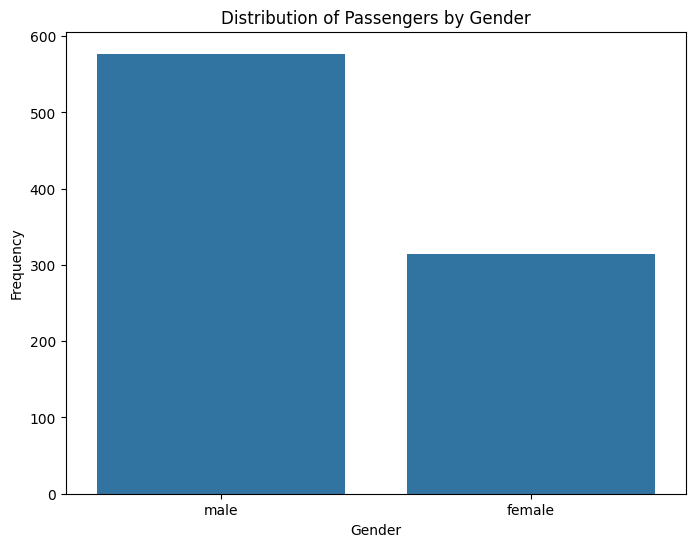

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Sex', data = df_capped)
plt.title('Distribution of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Age Distribution Histogram')

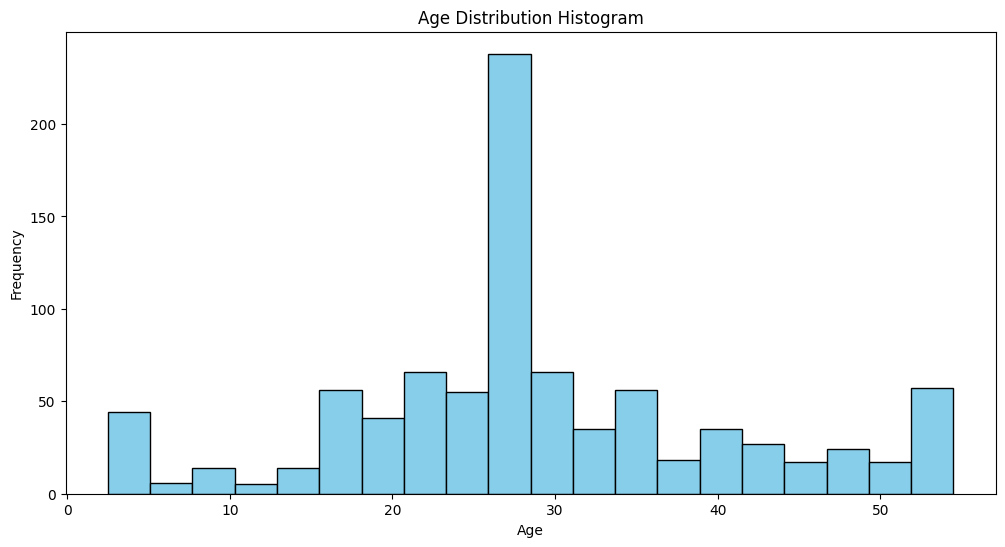

In [32]:
# Histogram for age distribution

plt.figure(figsize = (12, 6))
plt.hist(df_capped['Age'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')

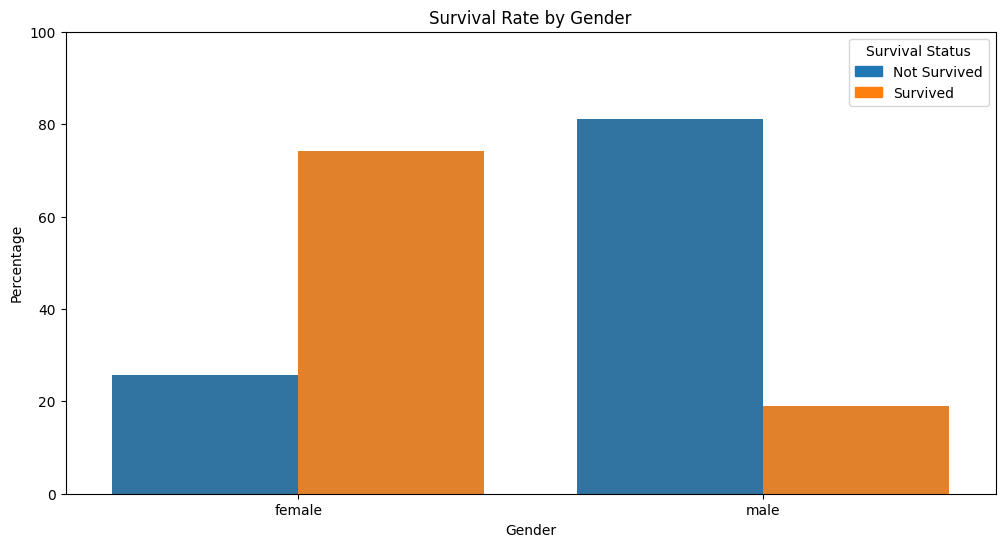

In [33]:
# Calculate survival percentages by gender
gender_survival = df_capped.groupby(['Sex', 'Survived']).size().reset_index(name = 'Count')
gender_survival['Percentage'] = gender_survival['Count'] / gender_survival.groupby('Sex')['Count'].transform('sum') * 100

# Plot percentage of survival by gender
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Sex', y = 'Percentage', hue = 'Survived', data = gender_survival)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Create custom legend
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color = sns.color_palette()[0], label = 'Not Survived'),mpatches.Patch(color = sns.color_palette()[1], label = 'Survived')]
plt.legend(handles = handles, title = 'Survival Status', loc = 'upper right')

plt.show()

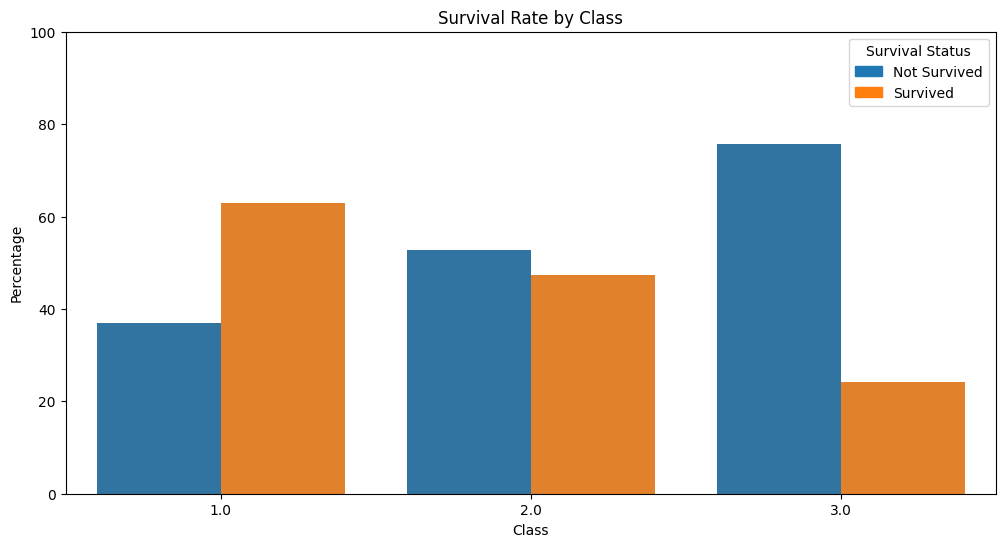

In [34]:
# Calculate survival percentages by class
class_survival = df_capped.groupby(['Pclass', 'Survived']).size().reset_index(name = 'Count')
class_survival['Percentage'] = class_survival['Count'] / class_survival.groupby('Pclass')['Count'].transform('sum') * 100

# Plot percentage of survival by class
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Pclass', y = 'Percentage', hue = 'Survived', data = class_survival)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Create custom legend
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color = sns.color_palette()[0], label = 'Not Survived'),mpatches.Patch(color = sns.color_palette()[1], label = 'Survived')]
plt.legend(handles = handles, title = 'Survival Status', loc = 'upper right')

plt.show()

# **Statistical Analysis**

In [35]:
# Calculate the mean, median, and mode for the 'Fare' column

mean_value = df['Fare'].mean()
median_value = df['Fare'].median()
mode_value = df['Fare'].mode()

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value.tolist()}")

Mean: 32.204207968574636
Median: 14.4542
Mode: [8.05]


In [36]:
# Calculate the mean, median, and mode for the 'Age' column

mean_value = df['Age'].mean()
median_value = df['Age'].median()
mode_value = df['Age'].mode()

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value.tolist()}")

Mean: 29.36158249158249
Median: 28.0
Mode: [28.0]


In [37]:
# Perform a t-test to determine if there's a significant difference in survival rate based on gender

from scipy import stats

# Separate the groups
male_survival = df[df['Sex'] == 'male']['Survived']
female_survival = df[df['Sex'] == 'female']['Survived']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(male_survival, female_survival, equal_var = False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in survival rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference in survival rates.")

T-statistic: -18.67183317725917, P-value: 2.2836009226010533e-61
Reject the null hypothesis: Significant difference in survival rates.
